### Structure matrix using real geo data

In [1]:
from pysal.lib import weights
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas

# Ignore FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import shapefile
gdf = gpd.read_file('./data/SVI2020 WY counties with death rate HepVu/SVI2020_WY_counties_with_death_rate_HepVu.shp')

In [3]:
gdf = gdf[['COUNTY','FIPS','geometry']]

In [4]:
# Set the CRS to a simple Cartesian coordinate system
gdf.crs = "EPSG:3395"  # This is a commonly used projected CRS

In [5]:
gdf

,COUNTY,FIPS,geometry
0,Albany,56001,"POLYGON ((-106.323 41.217, -106.323 41.335, -1..."
1,Big Horn,56003,"POLYGON ((-108.622 44.996, -108.622 44.997, -1..."
2,Campbell,56005,"POLYGON ((-106.025 44.980, -106.025 44.983, -1..."
3,Carbon,56007,"POLYGON ((-107.930 41.654, -107.930 41.660, -1..."
4,Converse,56009,"POLYGON ((-106.078 43.494, -106.017 43.495, -1..."
5,Crook,56011,"POLYGON ((-105.085 44.614, -105.085 44.621, -1..."
6,Fremont,56013,"POLYGON ((-110.053 44.008, -110.050 44.009, -1..."
7,Goshen,56015,"POLYGON ((-104.656 42.609, -104.626 42.609, -1..."
8,Hot Springs,56017,"POLYGON ((-109.313 43.813, -109.273 43.814, -1..."
9,Johnson,56019,"POLYGON ((-107.370 44.558, -107.370 44.560, -1..."


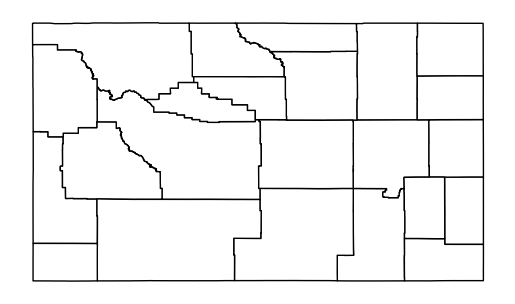

In [6]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf.plot(facecolor="w", edgecolor="k", ax=ax)

# Remove axes
ax.set_axis_off()

#### Queen contiguity matrix

In [7]:
# lattice stored in a geo-table
wq = weights.contiguity.Queen.from_dataframe(gdf)
neighbors_q = wq.neighbors

In [8]:
neighbors_q

{0: [10, 3, 4, 15],
 1: [16, 9, 21, 14],
 2: [16, 4, 5, 22, 9],
 3: [0, 18, 4, 6, 12],
 4: [0, 2, 3, 9, 12, 13, 15, 22],
 5: [2, 22],
 6: [3, 8, 12, 14, 17, 18, 19, 21],
 7: [10, 13, 15],
 8: [21, 6, 14],
 9: [16, 1, 2, 4, 21, 12],
 10: [0, 15, 7],
 11: [17, 18, 19, 20],
 12: [3, 4, 21, 6, 9],
 13: [4, 15, 22, 7],
 14: [1, 19, 21, 6, 8],
 15: [0, 4, 7, 10, 13],
 16: [1, 2, 9],
 17: [11, 18, 19, 6],
 18: [17, 3, 20, 6, 11],
 19: [17, 11, 6, 14],
 20: [18, 11],
 21: [1, 6, 8, 9, 12, 14],
 22: [2, 13, 4, 5]}

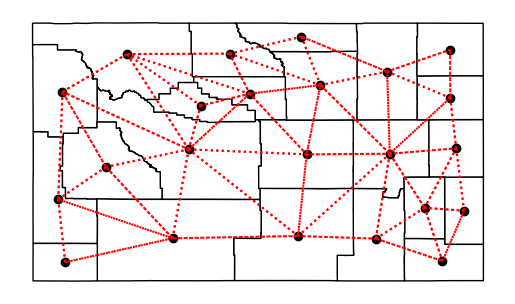

In [9]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf.plot(facecolor="w", edgecolor="k", ax=ax)

# Plot weights connectivity
wq.plot(gdf, edge_kws=dict(color="r", linestyle=":"), ax=ax)
# Remove axes
ax.set_axis_off()

In [10]:
Q = pandas.DataFrame(*wq.full()).astype(int)

In [11]:
Q = Q.multiply(-1)

In [12]:
# Iterate over the dictionary
for key, value in neighbors_q.items():
    count = len(value)
    Q[key][key] = count  # Fill the diagonal with count
    
Q.index = gdf["FIPS"].values

In [13]:
Q

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
56001,4,0,0,-1,-1,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
56003,0,4,0,0,0,0,0,0,0,-1,...,0,-1,0,-1,0,0,0,0,-1,0
56005,0,0,5,0,-1,-1,0,0,0,-1,...,0,0,0,-1,0,0,0,0,0,-1
56007,-1,0,0,5,-1,0,-1,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
56009,-1,0,-1,-1,8,0,0,0,0,-1,...,-1,0,-1,0,0,0,0,0,0,-1
56011,0,0,-1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
56013,0,0,0,-1,0,0,8,0,-1,0,...,0,-1,0,0,-1,-1,-1,0,-1,0
56015,0,0,0,0,0,0,0,3,0,0,...,-1,0,-1,0,0,0,0,0,0,0
56017,0,0,0,0,0,0,-1,0,3,0,...,0,-1,0,0,0,0,0,0,-1,0
56019,0,-1,-1,0,-1,0,0,0,0,6,...,0,0,0,-1,0,0,0,0,-1,0


### Lets filter some counties and calculate the adjacencies - Testing Islands

filtered_gdf = gdf

In [14]:
# filter gdf dataframe to select few counties
gdf = gdf.loc[gdf["FIPS"].isin(["56001", "56003", "56005", "56007", "56009", "56011", "56013", "56015", "56017", "56019"])]


In [15]:
gdf

,COUNTY,FIPS,geometry
0,Albany,56001,"POLYGON ((-106.323 41.217, -106.323 41.335, -1..."
1,Big Horn,56003,"POLYGON ((-108.622 44.996, -108.622 44.997, -1..."
2,Campbell,56005,"POLYGON ((-106.025 44.980, -106.025 44.983, -1..."
3,Carbon,56007,"POLYGON ((-107.930 41.654, -107.930 41.660, -1..."
4,Converse,56009,"POLYGON ((-106.078 43.494, -106.017 43.495, -1..."
5,Crook,56011,"POLYGON ((-105.085 44.614, -105.085 44.621, -1..."
6,Fremont,56013,"POLYGON ((-110.053 44.008, -110.050 44.009, -1..."
7,Goshen,56015,"POLYGON ((-104.656 42.609, -104.626 42.609, -1..."
8,Hot Springs,56017,"POLYGON ((-109.313 43.813, -109.273 43.814, -1..."
9,Johnson,56019,"POLYGON ((-107.370 44.558, -107.370 44.560, -1..."


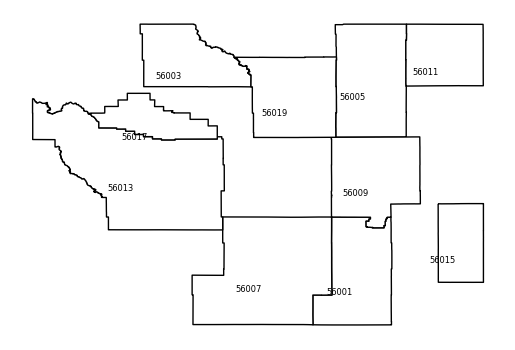

In [16]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf.plot(facecolor="w", edgecolor="k", ax=ax)

for i, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    text_to_display = f"FIPS: {row['FIPS']}"
    plt.text(centroid.x- 0.25, centroid.y- 0.25, str(row['FIPS']), fontsize=6, ha='center', color="black")
    # plt.text(centroid.x, centroid.y, text_to_display, fontsize=15, ha='center', color="black")

# Remove axes
ax.set_axis_off()

In [17]:
# lattice stored in a geo-table
wq = weights.contiguity.Queen.from_dataframe(gdf)
neighbors_q = wq.neighbors

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 7.
  warnings.warn(message)


In [18]:
neighbors_q

{0: [3, 4],
 1: [9],
 2: [9, 4, 5],
 3: [0, 4, 6],
 4: [0, 9, 2, 3],
 5: [2],
 6: [8, 3],
 7: [],
 8: [6],
 9: [1, 2, 4]}

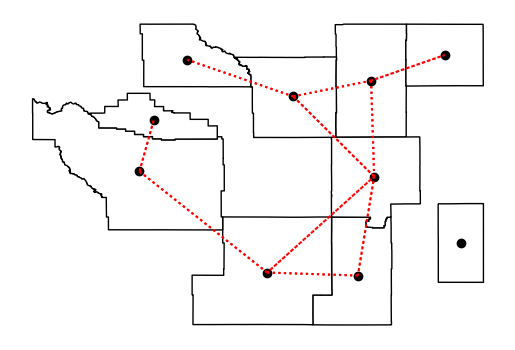

In [47]:
# Set up figure
f, ax = plt.subplots(1, 1, subplot_kw=dict(aspect="equal"))
# Plot grid
gdf.plot(facecolor="w", edgecolor="k", ax=ax)

# Plot weights connectivity
wq.plot(gdf, edge_kws=dict(color="r", linestyle=":"), ax=ax)
# Remove axes
ax.set_axis_off()

In [19]:
Q = pandas.DataFrame(*wq.full()).astype(int)

In [20]:
Q = Q.multiply(-1)

In [21]:
# Iterate over the dictionary
for key, value in neighbors_q.items():
    count = len(value)
    Q[key][key] = count  # Fill the diagonal with count
    
Q.index = gdf["FIPS"].values

In [22]:
Q

,0,1,2,3,4,5,6,7,8,9
56001,2,0,0,-1,-1,0,0,0,0,0
56003,0,1,0,0,0,0,0,0,0,-1
56005,0,0,3,0,-1,-1,0,0,0,-1
56007,-1,0,0,3,-1,0,-1,0,0,0
56009,-1,0,-1,-1,4,0,0,0,0,-1
56011,0,0,-1,0,0,1,0,0,0,0
56013,0,0,0,-1,0,0,2,0,-1,0
56015,0,0,0,0,0,0,0,0,0,0
56017,0,0,0,0,0,0,-1,0,1,0
56019,0,-1,-1,0,-1,0,0,0,0,3


### This way also works! 
Ref: https://pysal.org/libpysal/generated/libpysal.weights.Queen.html#libpysal.weights.Queen

In [23]:
wq = weights.contiguity.Queen.from_dataframe(gdf,geom_col='geometry',idVariable='FIPS')


/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 56015.
  warnings.warn(message)


In [24]:
neighbors_q = wq.neighbors

In [25]:
neighbors_q

{'56001': ['56009', '56007'],
 '56003': ['56019'],
 '56005': ['56009', '56019', '56011'],
 '56007': ['56009', '56013', '56001'],
 '56009': ['56019', '56001', '56007', '56005'],
 '56011': ['56005'],
 '56013': ['56007', '56017'],
 '56015': [],
 '56017': ['56013'],
 '56019': ['56005', '56009', '56003']}